# Stacked bar plot

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])

import urllib.request
import json

import seaborn as sns
sns.set(color_codes=True)

In [2]:
url = 'https://api.covid19india.org/states_daily.json'
urllib.request.urlretrieve(url, 'data.json')

with open('data.json') as f:
  data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)

In [3]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0


In [6]:
df_ = df.tail(3)
df_.drop('date', axis=1, inplace=True)
df_.set_index('status', inplace=True)
df_ = df_.T
df_ = df_.apply(pd.to_numeric,errors='coerce')
df_.drop('tt', inplace=True)

In [8]:
df_.head()

status,Confirmed,Recovered,Deceased
an,3.0,12.0,0.0
ap,379.0,490.0,3.0
ar,12.0,22.0,0.0
as,95.0,103.0,5.0
br,640.0,309.0,5.0


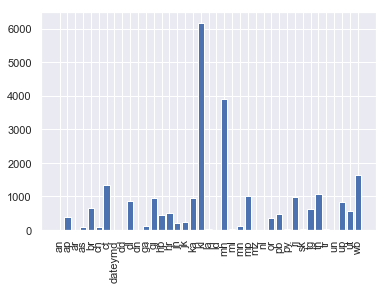

In [11]:
plt.bar(df_.index, df_.Confirmed);
plt.xticks(rotation=90);

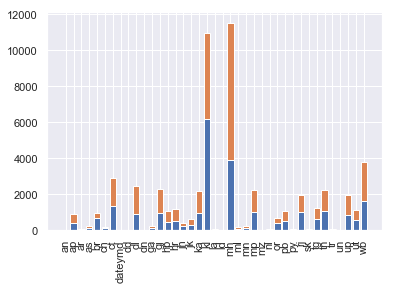

In [12]:
plt.bar(df_.index, df_.Confirmed);
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed);
plt.xticks(rotation=90);

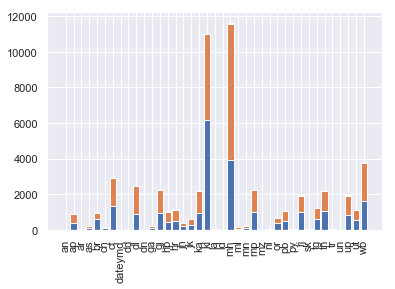

In [13]:
plt.bar(df_.index, df_.Confirmed);
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed);
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered);
plt.xticks(rotation=90);

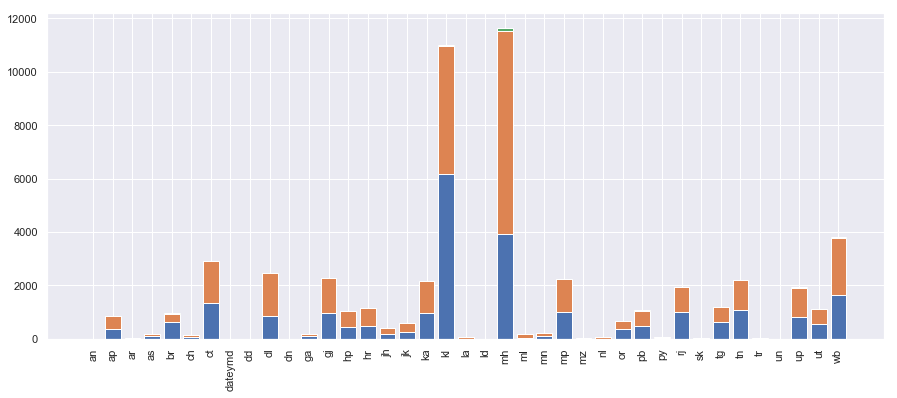

In [14]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed);
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed);
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered);
plt.xticks(rotation=90);

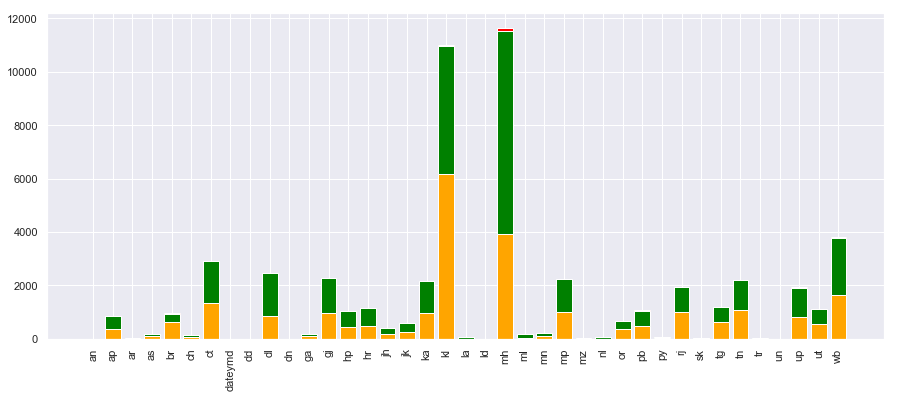

In [15]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation=90);

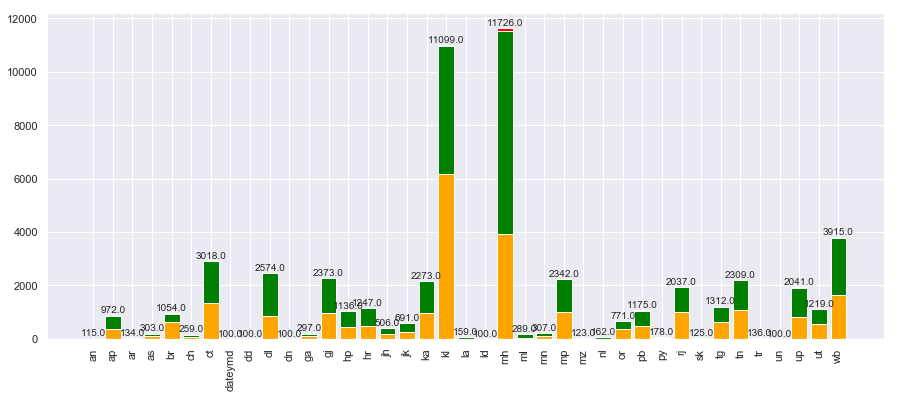

In [17]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation=90);

for i, val in enumerate(df_.index):
    y = df_.loc[val].sum() + 100
    x = i
    plt.text(x, y, str(y), ha="center");

## Stacked area bar plots

In [3]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0


In [4]:
df_ = df[['mh', 'date', 'status']]

In [5]:
df_.head()

,mh,date,status
0,14,14-Mar-20,Confirmed
1,0,14-Mar-20,Recovered
2,0,14-Mar-20,Deceased
3,18,15-Mar-20,Confirmed
4,0,15-Mar-20,Recovered


In [6]:
df_['mh'] = pd.to_numeric(df_['mh'])
df_['date'] = pd.to_datetime(df_['date'])

C:\Users\Varchasa Aggarwal\AppData\Local\Programs\Python\Python36\Lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Varchasa Aggarwal\AppData\Local\Programs\Python\Python36\Lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
df_.head()

,mh,date,status
0,14,2020-03-14,Confirmed
1,0,2020-03-14,Recovered
2,0,2020-03-14,Deceased
3,18,2020-03-15,Confirmed
4,0,2020-03-15,Recovered


In [8]:
df_ = df_.pivot_table(values="mh", columns="status", index="date")

In [9]:
df_.head()

status,Confirmed,Deceased,Recovered
date,,,
2020-03-14,14,0,0
2020-03-15,18,0,0
2020-03-16,6,0,0
2020-03-17,3,1,0
2020-03-18,3,0,0


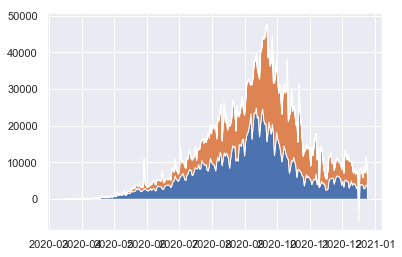

In [11]:
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased);

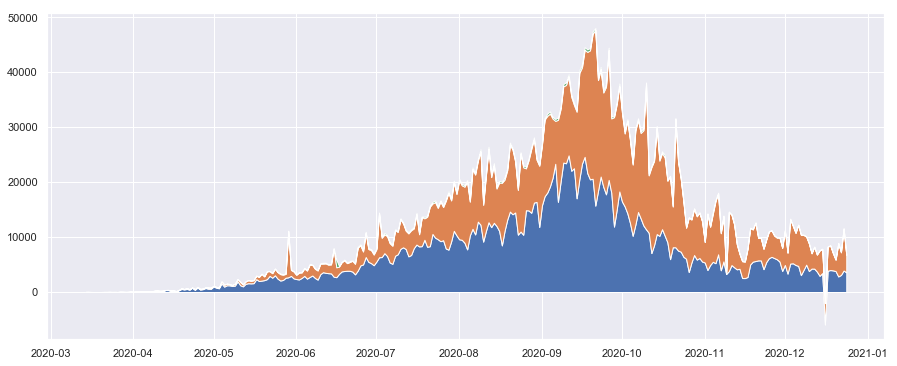

In [12]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased);

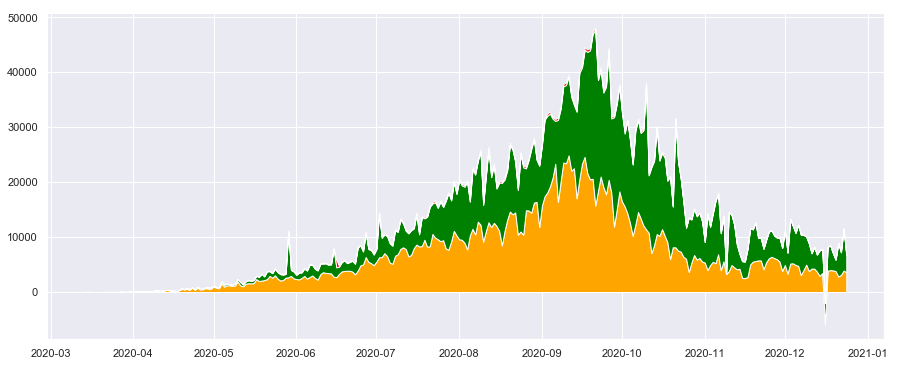

In [13]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased,
              colors=['orange', 'green', 'red']);